In [9]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pylab as plt
import geopandas as gpd

In [3]:
demo = pd.read_csv('CD_demographic.csv')
boro_2id = {'Manhattan':1, 'Bronx':2, 'Brooklyn':3, 'Queens':4, 'Staten Island':5}
boro_id = []
for boro in demo.Borough:
    if boro in boro_2id.keys():
        boro_id.append(str(boro_2id[boro]))

cd_num = []
for num in demo['CD Number']:
    num = "{:02d}".format(num)
    cd_num.append(num)
demo['CD_Num_New'] = cd_num
demo['Borough_id'] = boro_id
demo['CommBd'] = demo.Borough_id + demo.CD_Num_New

In [2]:
Month_Tonnage=pd.read_csv("DSNY_Monthly_Tonnage_Data.csv")
Tonnage=Month_Tonnage.fillna(0).copy()
Tonnage['COMMUNITYDISTRICT'] = Tonnage.COMMUNITYDISTRICT.map('{:02}'.format)
Tonnage['MONTH']=pd.to_datetime(Tonnage['MONTH'])
Tonnage['COMMUNITYDISTRICT']=Tonnage['COMMUNITYDISTRICT'].astype(str)
Tonnage['BOROUGH_ID']=Tonnage['BOROUGH_ID'].astype(str)
Tonnage['CommBd'] = Tonnage['BOROUGH_ID']+Tonnage['COMMUNITYDISTRICT']
y15_pan = Tonnage[(Tonnage.MONTH >=datetime.date(year=2015,month=3,day=1))&(Tonnage.MONTH < datetime.date(year=2015,month=5,day=1))].groupby('CommBd')[['REFUSETONSCOLLECTED','PAPERTONSCOLLECTED','MGPTONSCOLLECTED','RESORGANICSTONS']].sum()

y16_pan = Tonnage[(Tonnage.MONTH >=datetime.date(year=2016,month=3,day=1))&(Tonnage.MONTH < datetime.date(year=2016,month=5,day=1))].groupby('CommBd')[['REFUSETONSCOLLECTED','PAPERTONSCOLLECTED','MGPTONSCOLLECTED','RESORGANICSTONS']].sum()

y17_pan = Tonnage[(Tonnage.MONTH >=datetime.date(year=2017,month=3,day=1))&(Tonnage.MONTH < datetime.date(year=2017,month=5,day=1))].groupby('CommBd')[['REFUSETONSCOLLECTED','PAPERTONSCOLLECTED','MGPTONSCOLLECTED','RESORGANICSTONS']].sum()

y18_pan = Tonnage[(Tonnage.MONTH >=datetime.date(year=2018,month=3,day=1))&(Tonnage.MONTH < datetime.date(year=2018,month=5,day=1))].groupby('CommBd')[['REFUSETONSCOLLECTED','PAPERTONSCOLLECTED','MGPTONSCOLLECTED','RESORGANICSTONS']].sum()

y19_pan = Tonnage[(Tonnage.MONTH >=datetime.date(year=2019,month=3,day=1))&(Tonnage.MONTH < datetime.date(year=2019,month=5,day=1))].groupby('CommBd')[['REFUSETONSCOLLECTED','PAPERTONSCOLLECTED','MGPTONSCOLLECTED','RESORGANICSTONS']].sum()

y20_pan = Tonnage[(Tonnage.MONTH >=datetime.date(year=2020,month=3,day=1))&(Tonnage.MONTH < datetime.date(year=2020,month=5,day=1))].groupby('CommBd')[['REFUSETONSCOLLECTED','PAPERTONSCOLLECTED','MGPTONSCOLLECTED','RESORGANICSTONS']].sum()


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Comparing Series of datetimes with 'd

Demographic

In [6]:
pan_normal = y15_pan + y16_pan + y17_pan + y18_pan + y19_pan
pan_normal = (pan_normal / 5)
CommBd = demo.iloc[:,-1]
population = demo.iloc[:,3]
income = ((demo.iloc[:,5] + demo.iloc[:,6] + demo.iloc[:,7])/3)
demo_small = pd.DataFrame([CommBd,population,income]).transpose()
demo_small.columns = ['CommBd','Population','HH_Income']
demo_small = demo_small.set_index('CommBd').sort_index()

Normal Time

In [5]:
waste_demo = pan_normal.merge(demo_small,left_index=True, right_index=True )
waste_demo['avg_refuse'] = waste_demo.REFUSETONSCOLLECTED / waste_demo.Population
waste_demo['avg_paper'] = waste_demo.PAPERTONSCOLLECTED / waste_demo.Population
waste_demo['avg_mix'] = waste_demo.MGPTONSCOLLECTED / waste_demo.Population
waste_demo['avg_organic'] = waste_demo.RESORGANICSTONS / waste_demo.Population
waste_demo = waste_demo.drop(waste_demo.columns[[0,1,2,3]], axis=1)

Stay at Home Period (SAH)

In [7]:
SAH_demo = y20_pan.merge(demo_small,left_index=True, right_index=True )
SAH_demo['avg_refuse'] = SAH_demo.REFUSETONSCOLLECTED / SAH_demo.Population
SAH_demo['avg_paper'] = SAH_demo.PAPERTONSCOLLECTED / SAH_demo.Population
SAH_demo['avg_mix'] = SAH_demo.MGPTONSCOLLECTED / SAH_demo.Population
SAH_demo['avg_organic'] = SAH_demo.RESORGANICSTONS / SAH_demo.Population
SAH_demo = SAH_demo.drop(SAH_demo.columns[[0,1,2,3]], axis=1)

In [10]:
nycd=gpd.read_file('nycd_19d/nycd.shp')
nycd_heat = nycd.copy()

Refuse

In [42]:
diff = (y20_pan - pan_normal)
###
Tonnage_District=diff
#####
Income = demo_small.HH_Income.to_dict()
Trash = Tonnage_District.REFUSETONSCOLLECTED.to_dict()
Organics= Tonnage_District.RESORGANICSTONS.to_dict()
Paper = Tonnage_District.PAPERTONSCOLLECTED.to_dict()
Mgp = Tonnage_District.MGPTONSCOLLECTED.to_dict()
Income = Mgp = {int(k):int(v) for k,v in Income.items()}
Organics = {int(k):int(v) for k,v in Organics.items()}
Paper = {int(k):int(v) for k,v in Paper.items()}
Trash = {int(k):int(v) for k,v in Trash.items()}
Mgp = {int(k):int(v) for k,v in Mgp.items()}


nycd_heat['Income']=nycd_heat.BoroCD.map(Income)
nycd_heat['Organics']=nycd_heat.BoroCD.map(Organics)
nycd_heat['Paper']=nycd_heat.BoroCD.map(Paper)
nycd_heat['MGP']=nycd_heat.BoroCD.map(Mgp)
nycd_heat['Trash']=nycd_heat.BoroCD.map(Trash)
nycd_heat.dropna(inplace=True)


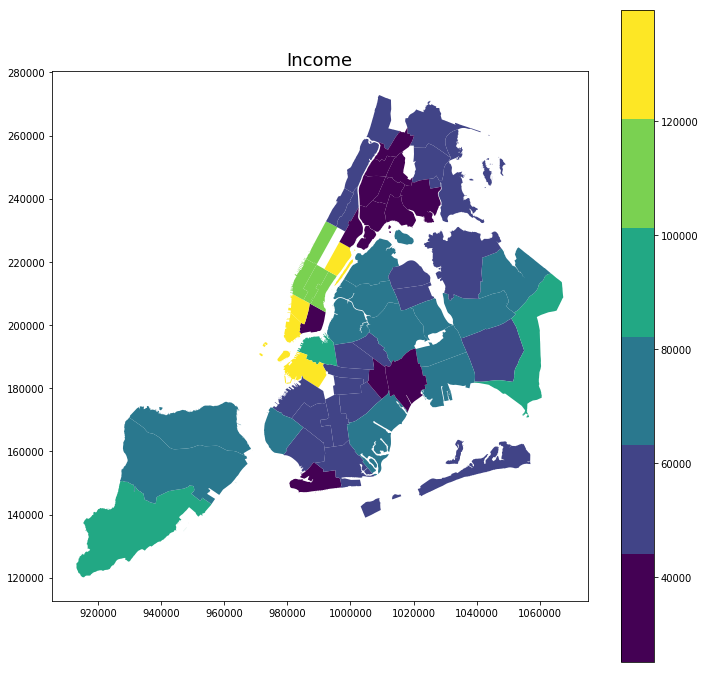

In [44]:
f, ax = plt.subplots(1,1, figsize=(12, 12))
ax.set_title("Income", fontsize=18)
nycd_heat.plot(ax=ax, column='Income', legend = True, cmap=plt.cm.get_cmap('viridis',6))


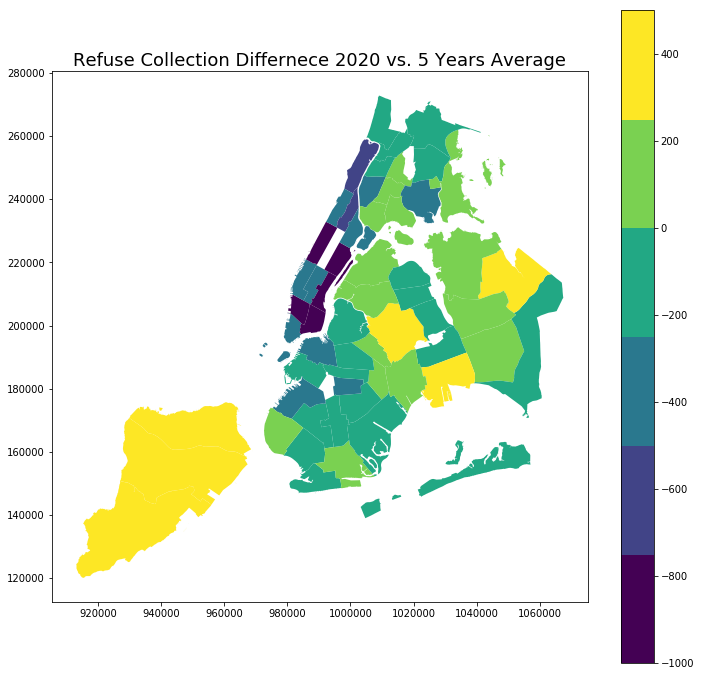

In [38]:
f, ax = plt.subplots(1,1, figsize=(12, 12))
ax.set_title("Refuse Collection Differnece 2020 vs. 5 Years Average", fontsize=18)
nycd_heat.plot(ax=ax, column='Trash', legend = True, cmap=plt.cm.get_cmap('viridis',6),vmin=-1000,vmax=500)
